In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [25]:
# Filter characteristics.
numTaps = 33
fSample = 96e3
fNyquist = fSample/2

#mid
#fc1 = 1000
#wc1 = fc1/fNyquist
#fc2 = 4000
#wc2 = fc2/fNyquist
#taps = signal.firwin(numTaps,[wc1, wc2], window='boxcar', pass_zero=False)

#bass
fc = 1000
wc = fc/fNyquist
taps = signal.firwin(numTaps,wc, window='boxcar')


print(wc)

0.020833333333333332


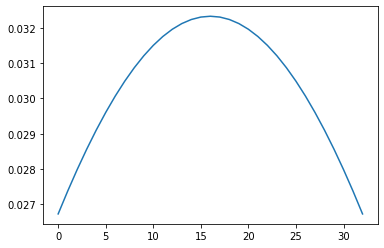

In [26]:
plt.plot(taps)

In [28]:
# Quantify taps
nBits = 24
nBitsFrac = 23
tapsQ = np.floor(taps * 2**nBitsFrac) / 2**nBitsFrac
print(tapsQ)
tapsQ = tapsQ * 0.8
sum(tapsQ)

[0.02673149 0.02737582 0.02798665 0.02856243 0.02910161 0.02960277
 0.03006494 0.03048658 0.03086686 0.0312047  0.03149927 0.03174984
 0.03195572 0.03211641 0.03223145 0.03230059 0.03232372 0.03230059
 0.03223145 0.03211641 0.03195572 0.03174984 0.03149927 0.0312047
 0.03086686 0.03048658 0.03006494 0.02960277 0.02910161 0.02856243
 0.02798665 0.02737582 0.02673149]


0.7999983787536621

[ 21.  43.  65.  88. 111. 135. 159. 183. 208. 233. 258. 284. 309. 335.
 361. 387. 412. 438. 464. 490. 515. 541. 566. 591. 616. 640. 664. 688.
 711. 734. 756. 778. 799.]


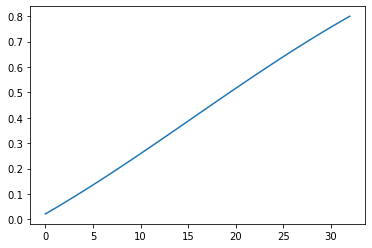

In [29]:
x = np.ones(numTaps)
x_filt = signal.lfilter(tapsQ,1,x)
plt.plot(x_filt)
print(np.floor(x_filt*1000))

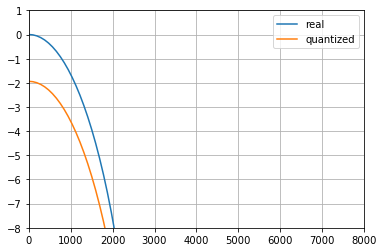

In [30]:
w,h = signal.freqz(taps)
wQ,hQ = signal.freqz(tapsQ)
plt.plot(w/np.pi*fNyquist, 20 * np.log10(abs(h)), label='real')
plt.plot(wQ/np.pi*fNyquist, 20 * np.log10(abs(hQ)), label='quantized')
plt.xlim(0,8000)
plt.ylim(-8,1)
plt.legend()
plt.grid()

In [31]:
# instantiation template

for i in range (0, numTaps):
    if (taps[i] >= 0):
        print(".b"+str(i)+"("+str(nBits)+"'d"+str(int(taps[i]*2**nBitsFrac))+"),")
    else:
        print(".b"+str(i)+"(-"+str(nBits)+"'d"+str(int(abs(taps[i])*2**nBitsFrac))+"),")


.b0(24'd224240),
.b1(24'd229645),
.b2(24'd234769),
.b3(24'd239599),
.b4(24'd244122),
.b5(24'd248326),
.b6(24'd252203),
.b7(24'd255740),
.b8(24'd258930),
.b9(24'd261764),
.b10(24'd264235),
.b11(24'd266337),
.b12(24'd268064),
.b13(24'd269412),
.b14(24'd270377),
.b15(24'd270957),
.b16(24'd271151),
.b17(24'd270957),
.b18(24'd270377),
.b19(24'd269412),
.b20(24'd268064),
.b21(24'd266337),
.b22(24'd264235),
.b23(24'd261764),
.b24(24'd258930),
.b25(24'd255740),
.b26(24'd252203),
.b27(24'd248326),
.b28(24'd244122),
.b29(24'd239599),
.b30(24'd234769),
.b31(24'd229645),
.b32(24'd224240),
